In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

In [2]:
df =pd.read_csv("D:/Case_Competition/Techkriti'21 _Battlefield_Round2/Techkriti'21_BattlefieldDataset.csv")

In [3]:
df.head(50)

,candidate_id,city,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High_School,NaN,5,50-99,Funded Startup,1,24,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0


In [4]:
df.isna().sum()

candidate_id              0
city                      0
city_index                0
gender                 4508
relevent_experience       0
enrolled_university     386
education               460
education_major        2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
hours_completed           0
target                    0
dtype: int64

In [5]:
df.shape

(19158, 14)

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

candidate_id            0.000000
city                    0.000000
city_index              0.000000
gender                 23.530640
relevent_experience     0.000000
enrolled_university     2.014824
education               2.401086
education_major        14.683161
experience              0.339284
company_size           30.994885
company_type           32.049274
last_new_job            2.207955
hours_completed         0.000000
target                  0.000000
dtype: float64

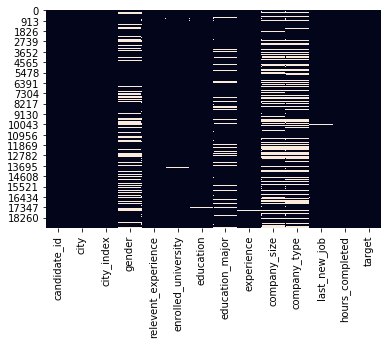

In [7]:
sns.heatmap(df.isnull(), cbar=False)

In [8]:
df["education"].value_counts()

Graduate          11598
Masters            4361
High_School        2017
Phd                 414
Primary_School      308
Name: education, dtype: int64

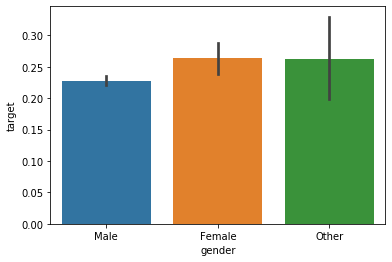

In [9]:
sns.barplot(x="gender",y="target",data=df)

In [10]:
df.corr()

,candidate_id,city_index,hours_completed,target
candidate_id,1.000000,-0.040455,0.000998,0.049475
city_index,-0.040455,1.000000,0.001920,-0.341665
hours_completed,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   candidate_id         19158 non-null  int64  
 1   city                 19158 non-null  object 
 2   city_index           19158 non-null  float64
 3   gender               14650 non-null  object 
 4   relevent_experience  19158 non-null  object 
 5   enrolled_university  18772 non-null  object 
 6   education            18698 non-null  object 
 7   education_major      16345 non-null  object 
 8   experience           19093 non-null  object 
 9   company_size         13220 non-null  object 
 10  company_type         13018 non-null  object 
 11  last_new_job         18735 non-null  object 
 12  hours_completed      19158 non-null  int64  
 13  target               19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [12]:
df.describe()

,candidate_id,city_index,hours_completed,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [13]:
df.isna().sum()

candidate_id              0
city                      0
city_index                0
gender                 4508
relevent_experience       0
enrolled_university     386
education               460
education_major        2813
experience               65
company_size           5938
company_type           6140
last_new_job            423
hours_completed           0
target                    0
dtype: int64

In [14]:
df[df.isna().any(axis=1)]

,candidate_id,city,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High_School,NaN,5,50-99,Funded Startup,1,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19151,11385,city_149,0.689,Male,No relevent experience,Full time course,Graduate,NaN,2,NaN,NaN,1,60,0
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High_School,NaN,<1,500-999,Pvt Ltd,2,97,0


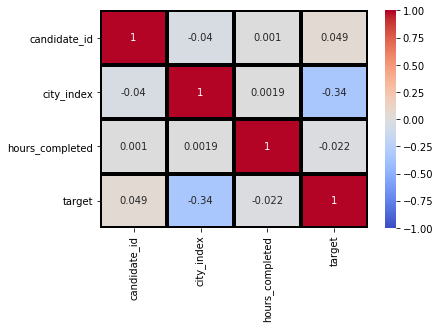

In [15]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')


In [16]:
df1=df

In [17]:
df1["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [18]:
df1.head()

,candidate_id,city,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [19]:
def city1(x):
    return x.split('_')[1][:]

In [20]:
df1['city_no']=df1['city'].apply(city1)
df1.drop(["city"],axis=1,inplace=True)
df1.head(10)

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1,103
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0,21
3,33241,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162
5,21651,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1,176
6,28806,0.920,Male,Has relevent experience,no_enrollment,High_School,NaN,5,50-99,Funded Startup,1,24,0,160
7,402,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,46
8,27107,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,103
9,699,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0,103


In [21]:
#label_encoder =LabelEncoder() 

In [22]:
df1["experience"].isna().sum()

65

In [23]:
#df1 = pd.get_dummies(df1,columns=["gender"])
#df1 = pd.get_dummies(df1,columns=["enrolled_university"])
#df1 = pd.get_dummies(df1,columns=["education"])
#df1 = pd.get_dummies(df1,columns=["education_major"])
#df1 = pd.get_dummies(df1,columns=["company_type"])
#df1.head()


In [24]:
#encoder=LabelEncoder()
#df1["relevent_experience"]=encoder.fit_transform(df1["relevent_experience"])
#df1.head()

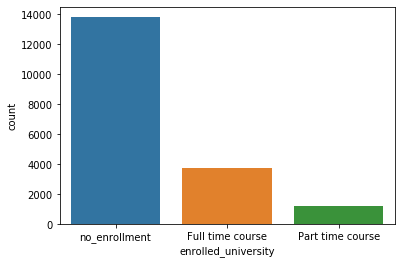

In [25]:
sns.countplot(x="enrolled_university",data=df1)

In [26]:
df1['enrolled_university'].fillna(df1.enrolled_university.mode()[0], inplace=True)
df1['education'].fillna(df1.education.mode()[0], inplace=True)
df1['company_type'].fillna(df1.company_type.mode()[0], inplace=True)
df1['gender'].fillna(df1.gender.mode()[0], inplace=True)
df1['experience'].fillna(df1.experience.mode()[0], inplace=True)

In [27]:
df1["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

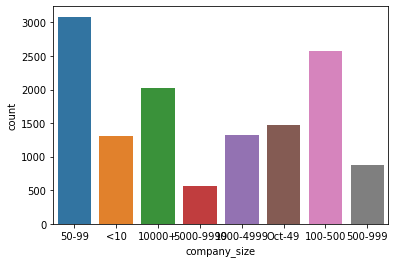

In [28]:
sns.countplot(x="company_size",data=df1)

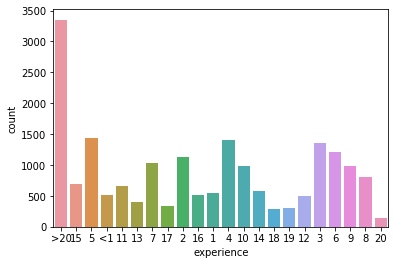

In [29]:
sns.countplot(x="experience",data=df1)

In [30]:
df1.head(20)

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Pvt Ltd,1,36,1,103
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,83,0,21
3,33241,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162
5,21651,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Pvt Ltd,1,24,1,176
6,28806,0.920,Male,Has relevent experience,no_enrollment,High_School,NaN,5,50-99,Funded Startup,1,24,0,160
7,402,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,46
8,27107,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,103
9,699,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0,103


In [31]:
df1['education_major'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
19153    False
19154    False
19155    False
19156     True
19157     True
Name: education_major, Length: 19158, dtype: bool

In [32]:
df1["education"].value_counts()

Graduate          12058
Masters            4361
High_School        2017
Phd                 414
Primary_School      308
Name: education, dtype: int64

In [33]:
#def myfunc(x,y):
    #if x ==High_School and y == NaN:
        #y=none
    #elif x ==Primary_School and y == NaN:
        #y=none
    #else:
        #return y

In [34]:
df1['education_major'] = df1['education_major'].fillna(df1['education'].map({'High_School':'None', 'Primary_School':'None'}))

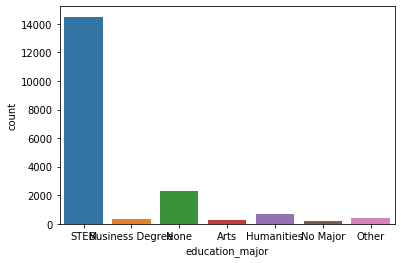

In [35]:
sns.countplot(x="education_major",data=df1)

In [36]:
df1["education_major"] = df1["education_major"].fillna(df["education_major"].mode().iloc[0])

In [37]:
df1.isna().sum()

candidate_id              0
city_index                0
gender                    0
relevent_experience       0
enrolled_university       0
education                 0
education_major           0
experience                0
company_size           5938
company_type              0
last_new_job            423
hours_completed           0
target                    0
city_no                   0
dtype: int64

In [38]:
df1.isna().sum()

candidate_id              0
city_index                0
gender                    0
relevent_experience       0
enrolled_university       0
education                 0
education_major           0
experience                0
company_size           5938
company_type              0
last_new_job            423
hours_completed           0
target                    0
city_no                   0
dtype: int64

In [39]:
df1.head(20)

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,Pvt Ltd,1,36,1,103
1,29725,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,83,0,21
3,33241,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162
5,21651,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,NaN,Pvt Ltd,1,24,1,176
6,28806,0.920,Male,Has relevent experience,no_enrollment,High_School,None,5,50-99,Funded Startup,1,24,0,160
7,402,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1,46
8,27107,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1,103
9,699,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0,103


In [40]:
encoder=LabelEncoder()
df1["relevent_experience"]=encoder.fit_transform(df1["relevent_experience"])
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,Male,0,no_enrollment,Graduate,STEM,>20,NaN,Pvt Ltd,1,36,1,103
1,29725,0.776,Male,1,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,Male,1,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,83,0,21
3,33241,0.789,Male,1,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,Male,0,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162


In [41]:
encoder=LabelEncoder()
df1["gender"]=encoder.fit_transform(df1["gender"])
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,no_enrollment,Graduate,STEM,>20,NaN,Pvt Ltd,1,36,1,103
1,29725,0.776,1,1,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,1,1,Full time course,Graduate,STEM,5,NaN,Pvt Ltd,never,83,0,21
3,33241,0.789,1,1,no_enrollment,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,1,0,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162


In [42]:
encoder=LabelEncoder()
df1["enrolled_university"]=encoder.fit_transform(df1["enrolled_university"])
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,Graduate,STEM,>20,NaN,Pvt Ltd,1,36,1,103
1,29725,0.776,1,1,2,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,1,1,0,Graduate,STEM,5,NaN,Pvt Ltd,never,83,0,21
3,33241,0.789,1,1,2,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,1,0,2,Masters,STEM,>20,50-99,Funded Startup,4,8,0,162


In [43]:
encoder=LabelEncoder()
df1["education"]=encoder.fit_transform(df1["education"])
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,0,STEM,>20,NaN,Pvt Ltd,1,36,1,103
1,29725,0.776,1,1,2,0,STEM,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,1,1,0,0,STEM,5,NaN,Pvt Ltd,never,83,0,21
3,33241,0.789,1,1,2,0,Business Degree,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,1,0,2,2,STEM,>20,50-99,Funded Startup,4,8,0,162


In [44]:
encoder=LabelEncoder()
df1["education_major"]=encoder.fit_transform(df1["education_major"])
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,0,6,>20,NaN,Pvt Ltd,1,36,1,103
1,29725,0.776,1,1,2,0,6,15,50-99,Pvt Ltd,>4,47,0,40
2,11561,0.624,1,1,0,0,6,5,NaN,Pvt Ltd,never,83,0,21
3,33241,0.789,1,1,2,0,1,<1,NaN,Pvt Ltd,never,52,1,115
4,666,0.767,1,0,2,2,6,>20,50-99,Funded Startup,4,8,0,162


In [45]:
encoder=LabelEncoder()
df1["company_type"]=encoder.fit_transform(df1["company_type"])
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,0,6,>20,NaN,5,1,36,1,103
1,29725,0.776,1,1,2,0,6,15,50-99,5,>4,47,0,40
2,11561,0.624,1,1,0,0,6,5,NaN,5,never,83,0,21
3,33241,0.789,1,1,2,0,1,<1,NaN,5,never,52,1,115
4,666,0.767,1,0,2,2,6,>20,50-99,1,4,8,0,162


In [46]:
encoder=LabelEncoder()
df1["company_type"]=encoder.fit_transform(df1["company_type"])
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,0,6,>20,NaN,5,1,36,1,103
1,29725,0.776,1,1,2,0,6,15,50-99,5,>4,47,0,40
2,11561,0.624,1,1,0,0,6,5,NaN,5,never,83,0,21
3,33241,0.789,1,1,2,0,1,<1,NaN,5,never,52,1,115
4,666,0.767,1,0,2,2,6,>20,50-99,1,4,8,0,162


In [47]:
df1.isna().sum()

candidate_id              0
city_index                0
gender                    0
relevent_experience       0
enrolled_university       0
education                 0
education_major           0
experience                0
company_size           5938
company_type              0
last_new_job            423
hours_completed           0
target                    0
city_no                   0
dtype: int64

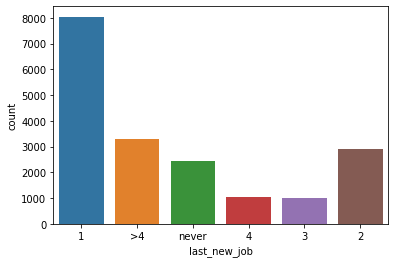

In [48]:
sns.countplot(x="last_new_job",data=df1)

In [49]:
df1['experience'].value_counts()

>20    3351
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [50]:
df1['last_new_job'] = df1['last_new_job'].fillna(df1['last_new_job'].map({'never':'0','>4':"5"}))

In [51]:
df1['last_new_job'].fillna(df.last_new_job.mode()[0], inplace=True)

In [52]:
encoder=LabelEncoder()
df1["last_new_job"]=encoder.fit_transform(df1['last_new_job'])
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,0,6,>20,NaN,5,0,36,1,103
1,29725,0.776,1,1,2,0,6,15,50-99,5,4,47,0,40
2,11561,0.624,1,1,0,0,6,5,NaN,5,5,83,0,21
3,33241,0.789,1,1,2,0,1,<1,NaN,5,5,52,1,115
4,666,0.767,1,0,2,2,6,>20,50-99,1,3,8,0,162


In [53]:
df1["company_size"] = df1["company_size"].fillna(df1["company_size"].mode().iloc[0])

In [54]:
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,0,6,>20,50-99,5,0,36,1,103
1,29725,0.776,1,1,2,0,6,15,50-99,5,4,47,0,40
2,11561,0.624,1,1,0,0,6,5,50-99,5,5,83,0,21
3,33241,0.789,1,1,2,0,1,<1,50-99,5,5,52,1,115
4,666,0.767,1,0,2,2,6,>20,50-99,1,3,8,0,162


In [55]:
df1["company_size"].value_counts()

50-99        9021
100-500      2571
10000+       2019
Oct-49       1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [56]:
"10000+".split('+')[0][:]

'10000'

In [57]:
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,0,6,>20,50-99,5,0,36,1,103
1,29725,0.776,1,1,2,0,6,15,50-99,5,4,47,0,40
2,11561,0.624,1,1,0,0,6,5,50-99,5,5,83,0,21
3,33241,0.789,1,1,2,0,1,<1,50-99,5,5,52,1,115
4,666,0.767,1,0,2,2,6,>20,50-99,1,3,8,0,162


In [58]:
import string
 

df1['company_size'] = df1['company_size'].str.replace('Oct-49', '10-49')
df1['company_size'] = df1['company_size'].str.replace('<10', '0-10')
df1['company_size'] = df1['company_size'].str.replace('10000+', '10000-20000')
#df1['company_size'] = df1['company_size'].fillna(df1['company_size'].map({'Oct-49':'10-49','\10000+':"10000-20000"}))
df1.head(20)

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no
0,8949,0.920,1,0,2,0,6,>20,50-99,5,0,36,1,103
1,29725,0.776,1,1,2,0,6,15,50-99,5,4,47,0,40
2,11561,0.624,1,1,0,0,6,5,50-99,5,5,83,0,21
3,33241,0.789,1,1,2,0,1,<1,50-99,5,5,52,1,115
4,666,0.767,1,0,2,2,6,>20,50-99,1,3,8,0,162
5,21651,0.764,1,0,1,0,6,11,50-99,5,0,24,1,176
6,28806,0.920,1,0,2,1,4,5,50-99,1,0,24,0,160
7,402,0.762,1,0,2,0,6,13,0-10,5,4,18,1,46
8,27107,0.920,1,0,2,0,6,7,50-99,5,0,46,1,103
9,699,0.920,1,0,2,0,6,17,10000-20000+,5,4,123,0,103


In [59]:
def company_size(x):
    return x.split('-')[0][:]

In [60]:
df1['company_size_l']=df1['company_size'].apply(company_size)
#df1.drop(["city"],axis=1,inplace=True)
df1.head(10)

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no,company_size_l
0,8949,0.920,1,0,2,0,6,>20,50-99,5,0,36,1,103,50
1,29725,0.776,1,1,2,0,6,15,50-99,5,4,47,0,40,50
2,11561,0.624,1,1,0,0,6,5,50-99,5,5,83,0,21,50
3,33241,0.789,1,1,2,0,1,<1,50-99,5,5,52,1,115,50
4,666,0.767,1,0,2,2,6,>20,50-99,1,3,8,0,162,50
5,21651,0.764,1,0,1,0,6,11,50-99,5,0,24,1,176,50
6,28806,0.920,1,0,2,1,4,5,50-99,1,0,24,0,160,50
7,402,0.762,1,0,2,0,6,13,0-10,5,4,18,1,46,0
8,27107,0.920,1,0,2,0,6,7,50-99,5,0,46,1,103,50
9,699,0.920,1,0,2,0,6,17,10000-20000+,5,4,123,0,103,10000


In [61]:
def company_size1(x):
    return x.split('-')[1][:]

In [62]:
df1['company_size_h']=df1['company_size'].apply(company_size1)
#df1.drop(["city"],axis=1,inplace=True)
df1.head(10)

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no,company_size_l,company_size_h
0,8949,0.920,1,0,2,0,6,>20,50-99,5,0,36,1,103,50,99
1,29725,0.776,1,1,2,0,6,15,50-99,5,4,47,0,40,50,99
2,11561,0.624,1,1,0,0,6,5,50-99,5,5,83,0,21,50,99
3,33241,0.789,1,1,2,0,1,<1,50-99,5,5,52,1,115,50,99
4,666,0.767,1,0,2,2,6,>20,50-99,1,3,8,0,162,50,99
5,21651,0.764,1,0,1,0,6,11,50-99,5,0,24,1,176,50,99
6,28806,0.920,1,0,2,1,4,5,50-99,1,0,24,0,160,50,99
7,402,0.762,1,0,2,0,6,13,0-10,5,4,18,1,46,0,10
8,27107,0.920,1,0,2,0,6,7,50-99,5,0,46,1,103,50,99
9,699,0.920,1,0,2,0,6,17,10000-20000+,5,4,123,0,103,10000,20000+


In [63]:
df1['company_size_h'] = df1['company_size_h'].str.replace('\+', '')
df1.head(20)

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no,company_size_l,company_size_h
0,8949,0.920,1,0,2,0,6,>20,50-99,5,0,36,1,103,50,99
1,29725,0.776,1,1,2,0,6,15,50-99,5,4,47,0,40,50,99
2,11561,0.624,1,1,0,0,6,5,50-99,5,5,83,0,21,50,99
3,33241,0.789,1,1,2,0,1,<1,50-99,5,5,52,1,115,50,99
4,666,0.767,1,0,2,2,6,>20,50-99,1,3,8,0,162,50,99
5,21651,0.764,1,0,1,0,6,11,50-99,5,0,24,1,176,50,99
6,28806,0.920,1,0,2,1,4,5,50-99,1,0,24,0,160,50,99
7,402,0.762,1,0,2,0,6,13,0-10,5,4,18,1,46,0,10
8,27107,0.920,1,0,2,0,6,7,50-99,5,0,46,1,103,50,99
9,699,0.920,1,0,2,0,6,17,10000-20000+,5,4,123,0,103,10000,20000


In [64]:
df1['experience'] = df1['experience'].str.replace('>20', '21')
df1['experience'] = df1['experience'].str.replace('<1', '0')


In [65]:
df1.head()

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_size,company_type,last_new_job,hours_completed,target,city_no,company_size_l,company_size_h
0,8949,0.920,1,0,2,0,6,21,50-99,5,0,36,1,103,50,99
1,29725,0.776,1,1,2,0,6,15,50-99,5,4,47,0,40,50,99
2,11561,0.624,1,1,0,0,6,5,50-99,5,5,83,0,21,50,99
3,33241,0.789,1,1,2,0,1,0,50-99,5,5,52,1,115,50,99
4,666,0.767,1,0,2,2,6,21,50-99,1,3,8,0,162,50,99


In [66]:
df1.isna().sum()

candidate_id           0
city_index             0
gender                 0
relevent_experience    0
enrolled_university    0
education              0
education_major        0
experience             0
company_size           0
company_type           0
last_new_job           0
hours_completed        0
target                 0
city_no                0
company_size_l         0
company_size_h         0
dtype: int64

In [67]:
df1.drop("company_size",axis=1,inplace=True)

In [68]:
df1.head(20)

,candidate_id,city_index,gender,relevent_experience,enrolled_university,education,education_major,experience,company_type,last_new_job,hours_completed,target,city_no,company_size_l,company_size_h
0,8949,0.920,1,0,2,0,6,21,5,0,36,1,103,50,99
1,29725,0.776,1,1,2,0,6,15,5,4,47,0,40,50,99
2,11561,0.624,1,1,0,0,6,5,5,5,83,0,21,50,99
3,33241,0.789,1,1,2,0,1,0,5,5,52,1,115,50,99
4,666,0.767,1,0,2,2,6,21,1,3,8,0,162,50,99
5,21651,0.764,1,0,1,0,6,11,5,0,24,1,176,50,99
6,28806,0.920,1,0,2,1,4,5,1,0,24,0,160,50,99
7,402,0.762,1,0,2,0,6,13,5,4,18,1,46,0,10
8,27107,0.920,1,0,2,0,6,7,5,0,46,1,103,50,99
9,699,0.920,1,0,2,0,6,17,5,4,123,0,103,10000,20000


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   candidate_id         19158 non-null  int64  
 1   city_index           19158 non-null  float64
 2   gender               19158 non-null  int32  
 3   relevent_experience  19158 non-null  int32  
 4   enrolled_university  19158 non-null  int32  
 5   education            19158 non-null  int32  
 6   education_major      19158 non-null  int32  
 7   experience           19158 non-null  object 
 8   company_type         19158 non-null  int64  
 9   last_new_job         19158 non-null  int32  
 10  hours_completed      19158 non-null  int64  
 11  target               19158 non-null  int64  
 12  city_no              19158 non-null  object 
 13  company_size_l       19158 non-null  object 
 14  company_size_h       19158 non-null  object 
dtypes: float64(1), int32(6), int64(4), o

In [104]:
df1["city_no"].value_counts()

103    4355
21     2702
16     1533
114    1336
160     845
       ... 
121       3
129       3
111       3
140       1
171       1
Name: city_no, Length: 123, dtype: int64

In [111]:
df1["city_no"]=df['city_no'].astype(str).astype(int)
df['company_size_l']=df['company_size_l'].astype(str).astype(int)
df['experience']=df['experience'].astype(str).astype(int)
df['company_size_h']=df['company_size_h'].astype(str).astype(int)

In [112]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   candidate_id         19158 non-null  int64  
 1   city_index           19158 non-null  float64
 2   gender               19158 non-null  int32  
 3   relevent_experience  19158 non-null  int32  
 4   enrolled_university  19158 non-null  int32  
 5   education            19158 non-null  int32  
 6   education_major      19158 non-null  int32  
 7   experience           19158 non-null  int32  
 8   company_type         19158 non-null  int64  
 9   last_new_job         19158 non-null  int32  
 10  hours_completed      19158 non-null  int64  
 11  target               19158 non-null  int64  
 12  city_no              19158 non-null  int32  
 13  company_size_l       19158 non-null  int32  
 14  company_size_h       19158 non-null  int32  
dtypes: float64(1), int32(10), int64(4)
m

In [113]:
df1["experience"].value_counts()

21    3351
5     1430
4     1403
3     1354
6     1216
2     1127
7     1028
10     985
9      980
8      802
15     686
11     664
14     586
1      549
0      522
16     508
12     494
13     399
17     342
19     304
18     280
20     148
Name: experience, dtype: int64

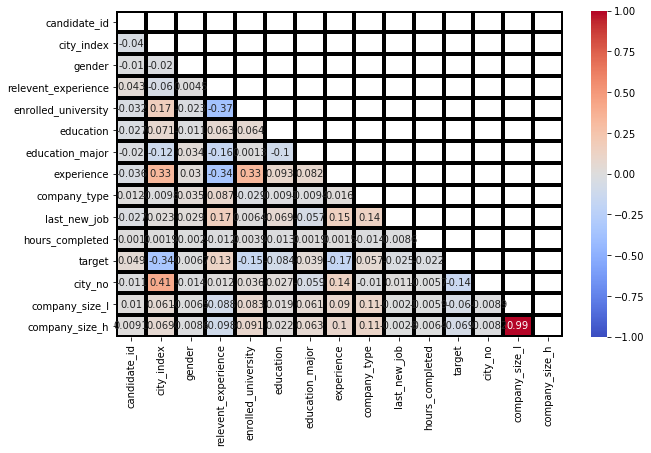

In [114]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
matrix = np.triu(df1.corr())
sns.heatmap(df1.corr(), annot = True,  vmin=-1, vmax=1, center= 0,ax=ax, cmap= 'coolwarm', linewidths=3, linecolor='black',mask=matrix)

In [115]:
# input 
x = df1.drop("target",axis=1)
  
# output 
y = df1["target"]

In [116]:
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13410 entries, 15510 to 15725
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   candidate_id         13410 non-null  int64  
 1   city_index           13410 non-null  float64
 2   gender               13410 non-null  int32  
 3   relevent_experience  13410 non-null  int32  
 4   enrolled_university  13410 non-null  int32  
 5   education            13410 non-null  int32  
 6   education_major      13410 non-null  int32  
 7   experience           13410 non-null  int32  
 8   company_type         13410 non-null  int64  
 9   last_new_job         13410 non-null  int32  
 10  hours_completed      13410 non-null  int64  
 11  city_no              13410 non-null  int32  
 12  company_size_l       13410 non-null  int32  
 13  company_size_h       13410 non-null  int32  
dtypes: float64(1), int32(10), int64(3)
memory usage: 1.0 MB


In [118]:
logreg.fit(x_train,y_train)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
y_pred=logreg.predict(x_test)

In [120]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4327,   10],
       [1400,   11]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

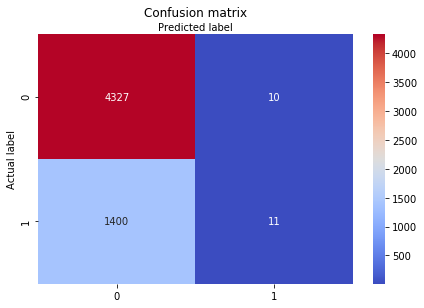

In [121]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [122]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7546972860125261
Precision: 0.5238095238095238
Recall: 0.007795889440113395


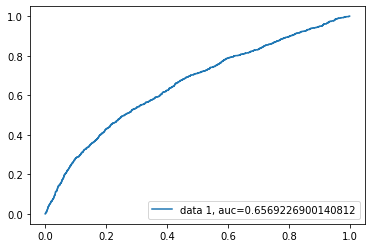

In [123]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [124]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [125]:

clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [ ]:
#!pip install mlxtend  

ValueError: Filler values must be provided when X has more than 2 training features.

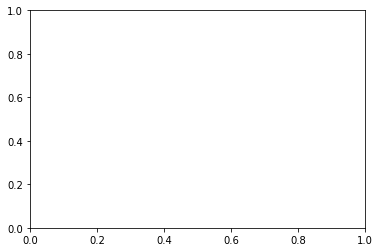

In [129]:
plot_decision_regions(x_train.values, y_train.values, clf=clf, legend=2)


In [130]:
value=1.5
width=0.75

fig = plot_decision_regions(x_train.values, y_train.values, clf=clf,
                  filler_feature_values={2: value, 3:value, 4:value},
                  filler_feature_ranges={2: width, 3: width, 4:width},
                  legend=2, ax=ax)

ValueError: Column(s) [ 5  6  7  8  9 10 11 12 13] need to be accounted for in either feature_index or filler_feature_values

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6971120389700766


In [83]:
model_2 = RandomForestClassifier()
cross_val_score(model_2,x_test,y_test,cv=5).mean()

0.7665287773867635

In [84]:
model_3= KNeighborsClassifier()
cross_val_score(model_3,x_test,y_test,cv=5).mean()

0.7146846785484542

In [85]:
from sklearn.ensemble import GradientBoostingClassifier
model_5 = GradientBoostingClassifier()
cross_val_score(model_5,x_test,y_test,cv=5).mean()

0.7750532410035191

In [89]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
y_pred = classifier.predict(x_test)

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3416  921]
 [ 835  576]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      4337
           1       0.38      0.41      0.40      1411

    accuracy                           0.69      5748
   macro avg       0.59      0.60      0.60      5748
weighted avg       0.70      0.69      0.70      5748



In [93]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [94]:
y_pred = regressor.predict(x_test)

In [95]:
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df2

,Actual,Predicted
3168,1,0.0
1060,0,1.0
3527,0,0.0
824,0,0.0
19012,1,0.0
...,...,...
9561,0,0.0
15729,0,0.0
11393,1,0.0
14558,0,0.0


In [96]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.30654140570633265
Mean Squared Error: 0.30654140570633265
Root Mean Squared Error: 0.5536618152864912


In [1190]:
cat_col =[col for col in df.columns if df[col].dtype=='O' ]
cat_col

['experience', 'city_no', 'company_size_l', 'company_size_h']

In [1191]:
catagorical=df[cat_col]
catagorical=catagorical.drop(["company_size","last_new_job","experience"],axis=1)
catagorical.head()

KeyError: "['company_size' 'last_new_job'] not found in axis"

In [1192]:
plt.figure(figsize=(15,5))
sns.boxplot(x= "city",y="target",data=df.sort_values("target",ascending=False))

ValueError: Could not interpret input 'city'

<Figure size 1080x360 with 0 Axes>

In [1193]:
catagorical["city"].value_counts()

KeyError: 'city'

In [1194]:
"city_40".split("_")[1][:]

'40'

In [1195]:
def city1(x):
    return x.split('_')[1][:]

In [1196]:
catagorical['city_no']=catagorical['city'].apply(city1)
catagorical.drop(["city"],axis=1,inplace=True)
catagorical.head()

KeyError: 'city'

In [1197]:
gender = pd.get_dummies(catagorical["gender"],drop_first=True)
gender.head()

KeyError: 'gender'

In [ ]:
catagorical["relevent_experience"].value_counts()

In [1198]:
relevent_experience = pd.get_dummies(catagorical["relevent_experience"],drop_first=True)
relevent_experience.head()

KeyError: 'relevent_experience'

In [1199]:
enrolled_university= pd.get_dummies(catagorical["enrolled_university"],drop_first=True)
enrolled_university.head()

KeyError: 'enrolled_university'

In [1200]:
education= pd.get_dummies(catagorical["education"],drop_first=True)
education.head()

KeyError: 'education'

In [ ]:
education_major= pd.get_dummies(catagorical["education_major"],drop_first=True)
education_major.head()

In [1201]:
company_type= pd.get_dummies(catagorical["company_type"],drop_first=True)
company_type.head()

KeyError: 'company_type'

In [1202]:
CrosstabResult=pd.crosstab(index=df['target'],columns=company_type['Early Stage Startup'])
print(CrosstabResult)
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Early Stage Startup      0    1
target                         
0                    13920  461
1                     4635  142
The P-Value of the ChiSq Test is: 0.45238566531614555


In [1203]:
CrosstabResult=pd.crosstab(index=df['target'],columns=company_type['Funded Startup'])
print(CrosstabResult)
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

Funded Startup      0    1
target                    
0               13520  861
1                4637  140
The P-Value of the ChiSq Test is: 2.677536574770706e-16


In [1204]:
CrosstabResult=pd.crosstab(index=df['target'],columns=company_type['NGO'])
print(CrosstabResult)
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

NGO         0    1
target            
0       13957  424
1        4680   97
The P-Value of the ChiSq Test is: 0.0008760960354827889


In [1205]:
CrosstabResult=pd.crosstab(index=df['target'],columns=df['company_type'])
print(CrosstabResult)
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

company_type    0    1    2   3    4      5
target                                     
0             461  861  424  92  745  11798
1             142  140   97  29  210   4159
The P-Value of the ChiSq Test is: 3.782006631159789e-18
